In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = df = pd.read_excel('Counselling_referral data_Sep - Dec 2022 - safe2choose.xlsx')
df.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,...,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,ref-Subreason 1,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,...,False,False,False,No,NaN,Suspected Pregnancy,NaN,NaN,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,...,False,False,False,No,NaN,Dropped,NaN,NaN,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent interactions                             2336 

In [4]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

Ticket ID                                          int64
Status                                            object
Source                                            object
Agent                                             object
Group                                             object
Created time                                      object
Month                                             object
Last update time                                  object
Resolution time (in hrs)                          object
Agent interactions                                 int64
Customer interactions                              int64
First response status                             object
Tags                                              object
Countries (NEW)                                   object
Region                                           float64
Agent 2                                           object
Agent 3                                           object
Language                       

In [5]:
# Finding the shape of the data
df.shape

(2336, 45)

In [6]:
#Length of Data
len(df)

2336

# cleaning the dataset

Number of rows: 2336
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent int

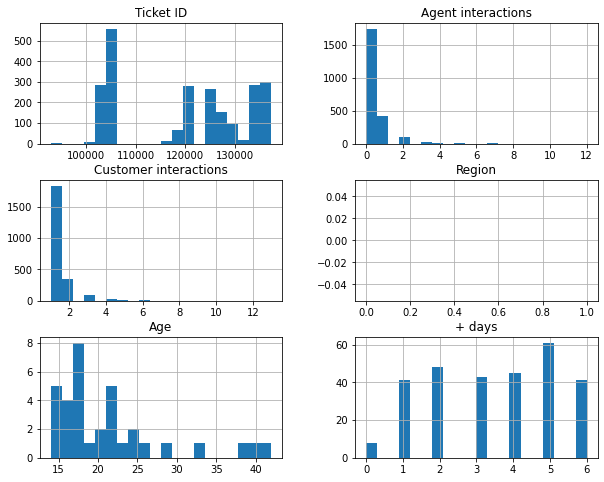

In [7]:
# Step 1: Check the size and shape of the dataframe
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Step 2: Get a summary of the dataframe's columns and their data types
df.info()

# Step 3: Check for missing values in the dataframe
print(df.isnull().sum())

# Step 4: Explore the distribution of numerical variables
print(df.describe())

# Step 5: Visualize the distribution of numerical variables using histograms
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 8))
plt.show()

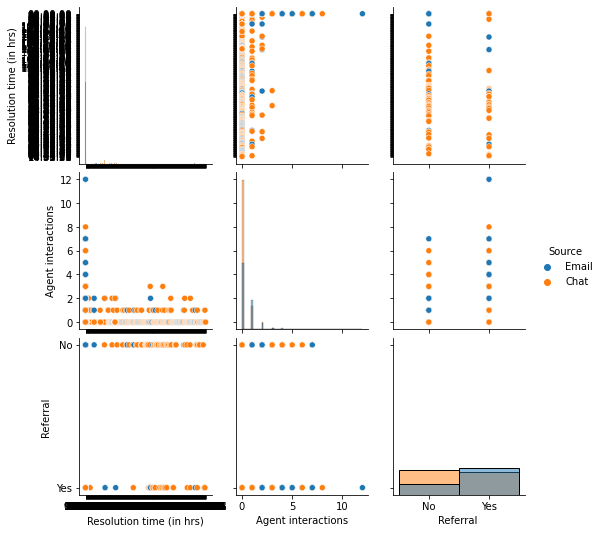

In [8]:
# Step 6: Explore the relationships between variables using scatterplots
import seaborn as sns
sns.pairplot(df, vars=['Resolution time (in hrs)', 'Agent interactions', 'Referral '], hue='Source', diag_kind='hist')
plt.show()

In [9]:
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [10]:
# handle missing values
for col in df.columns:
    # check if the column contains categorical values
    if df[col].dtype == 'O':
        # replace missing values with the mode (most frequent value) of the column
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # replace missing values with the mean of the column
        df[col].fillna(df[col].mean(), inplace=True)

In [11]:
# Replace missing values with the mode of each column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

In [12]:
#Checking for missing values
df.isna().sum()

Ticket ID                        0
Status                           0
Source                           0
Agent                            0
Group                            0
Created time                     0
Month                            0
Last update time                 0
Resolution time (in hrs)         0
Agent interactions               0
Customer interactions            0
Tags                             0
Language                         0
MA                               0
MVA/EVA                          0
D&E                              0
Induction                        0
PAC                              0
Referred to on-the-ground org    0
Referred to direct provider      0
dtype: int64

In [13]:
df.columns

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'Tags', 'Language', 'MA',
       'MVA/EVA', 'D&E', 'Induction', 'PAC', 'Referred to on-the-ground org',
       'Referred to direct provider'],
      dtype='object')

# eda

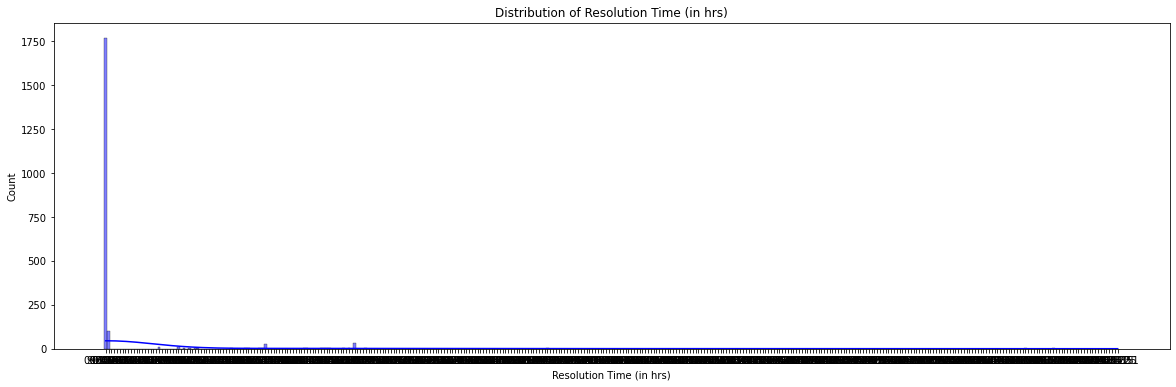

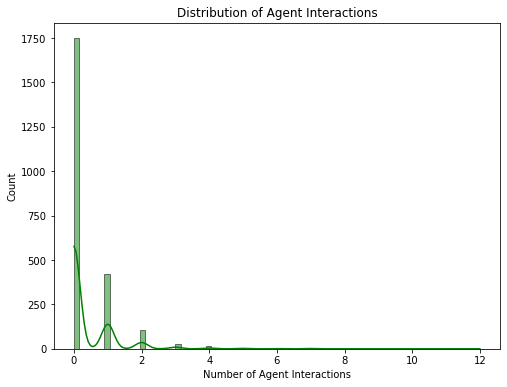

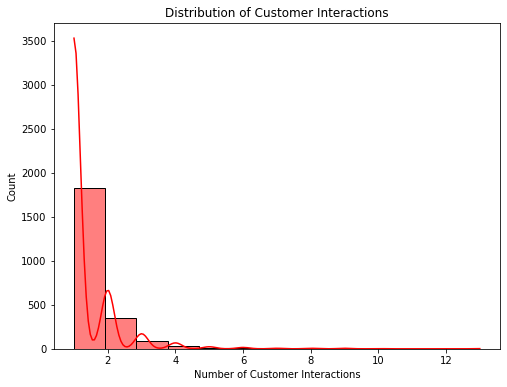

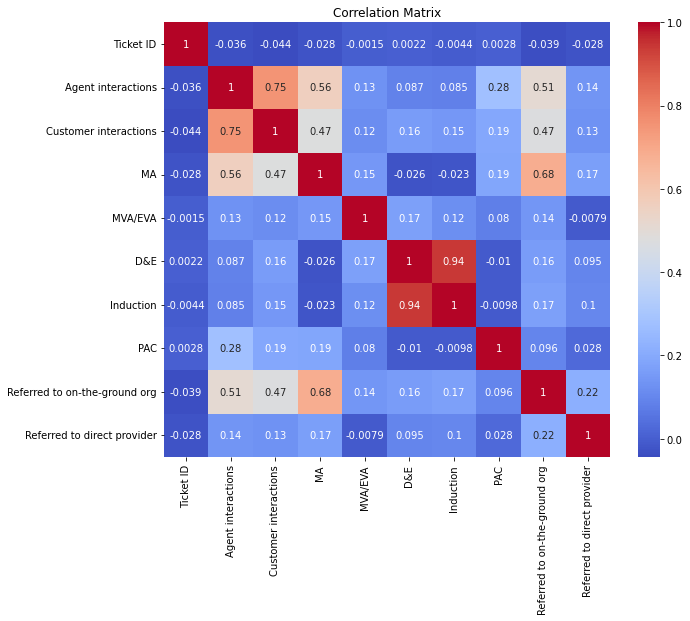

In [14]:
# plot the distribution of resolution time
plt.figure(figsize=(20,6))
sns.histplot(df['Resolution time (in hrs)'], kde=True, color='blue')
plt.title('Distribution of Resolution Time (in hrs)')
plt.xlabel('Resolution Time (in hrs)')
plt.show()

# plot the distribution of agent interactions
plt.figure(figsize=(8,6))
sns.histplot(df['Agent interactions'], kde=True, color='green')
plt.title('Distribution of Agent Interactions')
plt.xlabel('Number of Agent Interactions')
plt.show()

# plot the distribution of customer interactions
plt.figure(figsize=(8,6))
sns.histplot(df['Customer interactions'], kde=True, color='red')
plt.title('Distribution of Customer Interactions')
plt.xlabel('Number of Customer Interactions')
plt.show()

# plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# feature engineering

In [15]:
df.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,Tags,Language,MA,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,Away conversation,Spanish,False,False,False,False,False,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,Away conversation,Spanish,False,False,False,False,False,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,Away conversation,Spanish,False,False,False,False,False,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,Away conversation,Spanish,False,False,False,False,False,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,Away conversation,Spanish,False,False,False,False,False,False,False


In [16]:
# Convert the 'Created time' column to datetime format
df['Created time'] = pd.to_datetime(df['Created time'])

# Convert the 'Resolution time (in hrs)' column to a timedelta object
df['Resolution time (in hrs)'] = pd.to_timedelta(df['Resolution time (in hrs)'])

# Add the timedelta object to the 'Created time' column to get the resolution time in datetime format
df['Resolution time'] = df['Created time'] + df['Resolution time (in hrs)']

# Create a new column 'Response Time' by subtracting 'Created time' from 'Resolution time'
df['Response Time'] = (df['Resolution time'] - df['Created time']).dt.total_seconds() / 3600

# Print the first few rows of the updated dataframe
print(df.head())

   Ticket ID                    Status Source     Agent     Group  \
0      92854           Waiting on User  Email   Julia L   Spanish   
1      92855           Evaluation sent   Chat  No Agent   Spanish   
2      92856           Evaluation sent  Email  No Agent   Spanish   
3     101202  Waiting on KQ - reminder   Chat    Lucy P   Spanish   
4     101407             Waiting on KQ   Chat  No Agent  No Group   

         Created time      Month     Last update time  \
0 2022-09-01 00:01:23  September  2022-09-01 16:32:04   
1 2022-09-01 00:05:46  September  2022-09-27 18:12:41   
2 2022-09-01 00:10:48  September  2022-09-27 18:12:41   
3 2022-09-23 18:20:24  September  2022-09-30 20:23:28   
4 2022-09-24 12:16:03  September  2022-09-24 12:16:03   

  Resolution time (in hrs)  Agent interactions  ...  Language     MA MVA/EVA  \
0                   0 days                   1  ...   Spanish  False   False   
1                   0 days                   0  ...   Spanish  False   False   
2 

In [17]:
df

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,...,Language,MA,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider,Resolution time,Response Time
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,0 days 00:00:00,1,...,Spanish,False,False,False,False,False,False,False,2022-09-01 00:01:23,0.0000
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,0 days 00:00:00,0,...,Spanish,False,False,False,False,False,False,False,2022-09-01 00:05:46,0.0000
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,0 days 00:00:00,0,...,Spanish,False,False,False,False,False,False,False,2022-09-01 00:10:48,0.0000
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,0 days 00:00:00,1,...,Spanish,False,False,False,False,False,False,False,2022-09-23 18:20:24,0.0000
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,0 days 00:00:00,0,...,Spanish,False,False,False,False,False,False,False,2022-09-24 12:16:03,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,137318,Waiting on KQ,Email,No Agent,English,2022-12-31 21:34:30,December,2022-12-31 21:34:30,0 days 00:00:00,0,...,English,False,False,False,False,False,False,False,2022-12-31 21:34:30,0.0000
2332,137319,Waiting on KQ,Email,No Agent,Portuguese,2022-12-31 21:38:34,December,2022-12-31 21:38:35,0 days 00:00:00,0,...,Portuguese,False,False,False,False,False,False,False,2022-12-31 21:38:34,0.0000
2333,137320,Closed,Chat,Hellena Brinas,English,2022-12-31 21:44:31,December,2023-01-03 07:02:51,0 days 16:02:51,0,...,English,False,False,False,False,False,False,False,2023-01-01 13:47:22,16.0475
2334,137321,Waiting on KQ,Chat,No Agent,Spanish,2022-12-31 22:47:44,December,2022-12-31 22:47:45,0 days 00:00:00,0,...,Spanish,False,False,False,False,False,False,False,2022-12-31 22:47:44,0.0000


In [18]:
# Import necessary libraries
from langdetect import detect_langs

# Define function to extract the confidence level that a ticket is in Spanish
def spanish_confidence(text):
    try:
        langs = detect_langs(text)
        for lang in langs:
            if lang.lang == 'es':
                return lang.prob
        return 0.0
    except:
        return 0.0

# Apply the function to the 'Customer interactions' column and create a new feature
df['spanish_confidence'] = df['Customer interactions'].apply(spanish_confidence)

In [19]:
# Define function to check if a ticket has been referred
def is_referred(row):
    if row['Referred to on-the-ground org'] or row['Referred to direct provider']:
        return 1
    else:
        return 0

# Apply the function to the DataFrame and create a new feature
df['referred'] = df.apply(is_referred, axis=1)

In [20]:
# Create one-hot encoded features for Status, Source, and Group columns
one_hot_status = pd.get_dummies(df['Status'], prefix='status')
one_hot_source = pd.get_dummies(df['Source'], prefix='source')
one_hot_group = pd.get_dummies(df['Group'], prefix='group')

# Combine the one-hot encoded features with the original DataFrame
df_encoded = pd.concat([df, one_hot_status, one_hot_source, one_hot_group], axis=1)

# Drop the original Status, Source, and Group columns
df_encoded.drop(['Status', 'Source', 'Group'], axis=1, inplace=True)

In [21]:
df

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,...,MVA/EVA,D&E,Induction,PAC,Referred to on-the-ground org,Referred to direct provider,Resolution time,Response Time,spanish_confidence,referred
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,0 days 00:00:00,1,...,False,False,False,False,False,False,2022-09-01 00:01:23,0.0000,0.0,0
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,0 days 00:00:00,0,...,False,False,False,False,False,False,2022-09-01 00:05:46,0.0000,0.0,0
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,0 days 00:00:00,0,...,False,False,False,False,False,False,2022-09-01 00:10:48,0.0000,0.0,0
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,0 days 00:00:00,1,...,False,False,False,False,False,False,2022-09-23 18:20:24,0.0000,0.0,0
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,0 days 00:00:00,0,...,False,False,False,False,False,False,2022-09-24 12:16:03,0.0000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,137318,Waiting on KQ,Email,No Agent,English,2022-12-31 21:34:30,December,2022-12-31 21:34:30,0 days 00:00:00,0,...,False,False,False,False,False,False,2022-12-31 21:34:30,0.0000,0.0,0
2332,137319,Waiting on KQ,Email,No Agent,Portuguese,2022-12-31 21:38:34,December,2022-12-31 21:38:35,0 days 00:00:00,0,...,False,False,False,False,False,False,2022-12-31 21:38:34,0.0000,0.0,0
2333,137320,Closed,Chat,Hellena Brinas,English,2022-12-31 21:44:31,December,2023-01-03 07:02:51,0 days 16:02:51,0,...,False,False,False,False,False,False,2023-01-01 13:47:22,16.0475,0.0,0
2334,137321,Waiting on KQ,Chat,No Agent,Spanish,2022-12-31 22:47:44,December,2022-12-31 22:47:45,0 days 00:00:00,0,...,False,False,False,False,False,False,2022-12-31 22:47:44,0.0000,0.0,0


In [22]:
df.columns

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'Tags', 'Language', 'MA',
       'MVA/EVA', 'D&E', 'Induction', 'PAC', 'Referred to on-the-ground org',
       'Referred to direct provider', 'Resolution time', 'Response Time',
       'spanish_confidence', 'referred'],
      dtype='object')

In [23]:
# Group the data by agent and calculate the mean resolution time
agent_resolution_time = df.groupby('Agent')['Resolution time (in hrs)'].mean()

# Display the results
print(agent_resolution_time)


Agent
Bonnie K         0 days 06:39:37.532258064
Emma G           0 days 01:11:43.381443298
Hellena Brinas   0 days 04:51:40.777777777
Julia L             0 days 15:19:29.400000
Lucy P           0 days 05:36:47.892156862
Maria Silva      0 days 03:17:41.858585858
No Agent         0 days 18:13:11.547694251
Paty C.          0 days 03:24:41.910447761
Pauline D                  0 days 04:00:39
Salma S.         0 days 02:50:09.419354838
Teresa V.        0 days 02:17:20.883720930
Wendy S.         0 days 01:47:38.594936708
Zoe Z            0 days 01:50:47.837837837
Name: Resolution time (in hrs), dtype: timedelta64[ns]


In [24]:
# Group the dataset by Agent and calculate the average resolution time and interactions per ticket
agent_df = df.groupby('Agent')['Resolution time (in hrs)', 'Customer interactions'].mean()

# Print the results
print(agent_df)

                Customer interactions
Agent                                
Bonnie K                     2.129032
Emma G                       2.041237
Hellena Brinas               2.012346
Julia L                      2.400000
Lucy P                       1.637255
Maria Silva                  1.838384
No Agent                     1.021478
Paty C.                      1.686567
Pauline D                    1.052632
Salma S.                     2.483871
Teresa V.                    1.883721
Wendy S.                     2.645570
Zoe Z                        2.702703


In [25]:
# Convert the 'Customer interactions' column to a numeric type
df['Customer interactions'] = pd.to_numeric(df['Customer interactions'], errors='coerce')

# Calculate the correlation coefficient between 'Customer interactions' and 'Resolution time (in hrs)'
corr_coeff = df['Customer interactions'].corr(df['Resolution time (in hrs)'].dt.total_seconds() / 3600)

print("Correlation coefficient: {:.2f}".format(corr_coeff))


Correlation coefficient: -0.13


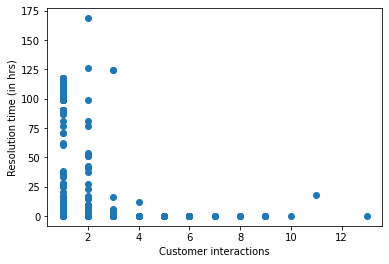

In [26]:
plt.scatter(df['Customer interactions'], df['Resolution time (in hrs)'].dt.total_seconds() / 3600)
plt.xlabel('Customer interactions')
plt.ylabel('Resolution time (in hrs)')
plt.show()

In [27]:
import statsmodels.api as sm

# Fit a linear regression model to the data
X = df['Customer interactions']
y = df['Resolution time (in hrs)'].dt.total_seconds() / 3600
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Resolution time (in hrs)   R-squared:                       0.017
Model:                                  OLS   Adj. R-squared:                  0.016
Method:                       Least Squares   F-statistic:                     40.10
Date:                      Thu, 20 Apr 2023   Prob (F-statistic):           2.89e-10
Time:                              01:48:42   Log-Likelihood:                -11478.
No. Observations:                      2336   AIC:                         2.296e+04
Df Residuals:                          2334   BIC:                         2.297e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [28]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg_model = LinearRegression()

# Fit the model using the 'Customer interactions' column as the predictor and 'Resolution time (in hrs)' column as the response variable
reg_model.fit(df[['Customer interactions']], df['Resolution time (in hrs)'].dt.total_seconds() / 3600)

# Print the coefficients of the model
print('Intercept: ', reg_model.intercept_)
print('Coefficients: ', reg_model.coef_)

Intercept:  19.947790026317293
Coefficients:  [-4.78679329]


Correlation coefficient: -0.13


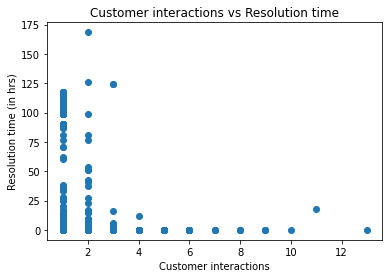

Intercept:  19.947790026317293
Coefficients:  [-4.78679329]
Mean squared error: 1084.66
R-squared value: 0.02
Predicted resolution times for new customer interactions:  [ 5.58741015  0.80061686 -3.98617643]


In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Convert the 'Customer interactions' column to a numeric type
df['Customer interactions'] = pd.to_numeric(df['Customer interactions'], errors='coerce')

# Calculate the correlation coefficient between 'Customer interactions' and 'Resolution time (in hrs)'
corr_coeff = df['Customer interactions'].corr(df['Resolution time (in hrs)'].dt.total_seconds() / 3600)

# Print the correlation coefficient
print("Correlation coefficient: {:.2f}".format(corr_coeff))

# Create a scatter plot of the data
plt.scatter(df['Customer interactions'], df['Resolution time (in hrs)'].dt.total_seconds() / 3600)
plt.xlabel('Customer interactions')
plt.ylabel('Resolution time (in hrs)')
plt.title('Customer interactions vs Resolution time')
plt.show()

# Fit a linear regression model to the data
X = df[['Customer interactions']]
y = df['Resolution time (in hrs)'].dt.total_seconds() / 3600
model = LinearRegression()
model.fit(X, y)

# Print the intercept and coefficients of the model
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

# Calculate the mean squared error and R-squared value of the model
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared value: {:.2f}".format(r2))

# Make predictions on new data
X_new = np.array([3, 4, 5]).reshape((-1, 1))
y_new = model.predict(X_new)
print("Predicted resolution times for new customer interactions: ", y_new)


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Convert the 'Customer interactions' column to a numeric type
df['Customer interactions'] = pd.to_numeric(df['Customer interactions'], errors='coerce')

# Calculate the correlation coefficient between 'Customer interactions' and 'Resolution time (in hrs)'
corr_coeff = df['Customer interactions'].corr(df['Resolution time (in hrs)'].dt.total_seconds() / 3600)
print("Correlation coefficient: {:.2f}".format(corr_coeff))

# Fit a linear regression model to the data
X = df['Customer interactions'].values.reshape(-1, 1)
y = df['Resolution time (in hrs)'].dt.total_seconds() / 3600
reg_model = LinearRegression().fit(X, y)

# Print the model coefficients
print("Intercept: ", reg_model.intercept_)
print("Coefficients: ", reg_model.coef_)

# Evaluate the performance of the model
y_pred = reg_model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared value: {:.2f}".format(r2))

# Make predictions on new data
new_data = pd.DataFrame({'Customer interactions': [10, 5, 1]})
predicted_times = reg_model.predict(new_data)
print("Predicted resolution times for new customer interactions: ", predicted_times)


Correlation coefficient: -0.13
Intercept:  19.947790026317293
Coefficients:  [-4.78679329]
Mean squared error: 1084.66
R-squared value: 0.02
Predicted resolution times for new customer interactions:  [-27.92014288  -3.98617643  15.16099674]


## This means that the linear regression model has a low R-squared value, indicating that it does not explain much of the variance in the data. The predicted resolution times for new customer interactions suggest that as the number of interactions decreases, the resolution time increases, which is consistent with the negative correlation coefficient between the two variables.